# Initializations

In [2]:
import requests, sys
import json
import numpy as np
import matplotlib.pyplot as plt
try:
    import pandas as pd
    if pd.__version__ > "0.22.0":
        has_pandas = True
    else:
        has_pandas = False
except ImportError:
    has_pandas = False

%matplotlib inline
 
server = "http://rest.ensembl.org"
headers={ "Content-Type" : "application/json", "Accept" : "application/json"}

# Lookup

In [3]:
ext = "/lookup/id"
# Get lookup data
r = requests.post(server+ext, headers=headers, data='{ "expand" : 1, "ids" : ["ENSG00000157764"] }')

if not r.ok:
    r.raise_for_status()
    sys.exit()
    
found = json.loads(r.text)


# Get sequences

In [4]:
# Create list of ID
IDs = []
for transcripts in found.values():
    for transcript in transcripts["Transcript"]:
        IDs.append(transcript["id"])
        
dquotes_ids=json.dumps({"ids" : IDs})
print(dquotes_ids)

# Get sequence data
ext = "/sequence/id"

# Make request and check status
r = requests.post(server+ext, headers = headers, data = dquotes_ids)
if not r.ok:
    r.raise_for_status()
    sys.exit()
    
json_data = json.loads(r.text)

{"ids": ["ENST00000496384", "ENST00000644120", "ENST00000642875", "ENST00000644969", "ENST00000646891", "ENST00000644905", "ENST00000642228", "ENST00000288602", "ENST00000645443", "ENST00000646730", "ENST00000479537", "ENST00000647434", "ENST00000644650", "ENST00000497784", "ENST00000646334", "ENST00000642272", "ENST00000643356", "ENST00000642808", "ENST00000643790", "ENST00000646427", "ENST00000469930"]}


# Get triplets

From position 102 of each sequence. I am taking into account the position 102 of the string in python, which starts counting from position 0, as most programming languages do. If we wanted position 102 to start counting from 1 as the position of first base, line 4 would be:

```python
 triplet = record["seq"][101:104]
```

,Count
ATA,1
GAC,3
GTA,2
GCC,3
CCG,4
GGC,2
TAG,1
TCC,1
CAT,1
CTC,1


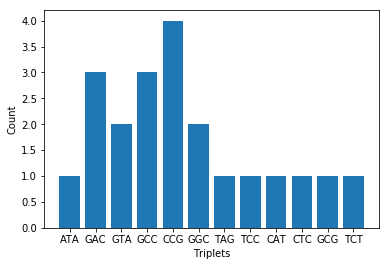

In [6]:
count_triplets = {}
count_all = 0
for record in json_data:
    triplet = record["seq"][102:105]
    count_all += 1
    if triplet in count_triplets:
        count_triplets[triplet] += 1
    else:
        count_triplets[triplet] = 1

if has_pandas:
    df = pd.DataFrame.from_dict(count_triplets, orient='index', columns=['Count'])
    display(df)
else:
    display(count_triplets)
plt.bar(count_triplets.keys(), count_triplets.values())
plt.xlabel('Triplets')
_ = plt.ylabel('Count')

# Outputs

In [9]:
%%bash
jupyter nbconvert --to=latex --template=~/report.tplx find_bases.ipynb 1> /dev/null
pdflatex -shell-escape find_bases 1> /dev/null

[NbConvertApp] Converting notebook find_bases.ipynb to latex
[NbConvertApp] Support files will be in find_bases_files/
[NbConvertApp] Making directory find_bases_files
[NbConvertApp] Writing 28783 bytes to find_bases.tex
